# Modelagem, Simulação e Implementação de Sistemas
### Lista V - Análise Transitória
Guilherme Brandão da Silva



In [1]:
% Carrega módulos para operações simbólicas e operações em frequência
pkg load control
pkg load symbolic
pkg load signal

In [78]:
% Function para Plotar a Inversa de Laplace (Simbólica)
function plot_ilap(f, l)
    p = ezplot(f);
    axis(l);
    set(p,'linewidth', 1, 'color', 'k');
end;

### Exemplo 1: Obtenha a Resposta  ao Degrau do Sistemas:
$$G(s)=\frac{25}{s^2 + 4s + 25}$$

yfinal =  1.0041
ysettle =  0.56998
settling_ind =  40
ans =

  scalar structure containing the fields:

    RiseTime =  0.30718
    SettlingTime =  3
    SettlingMin =  0.93563
    SettlingMax =  1.2517
    Overshoot =  0.24662
    Undershoot =  0.068154
    Peak =  1.2517
    PeakTime =  0.66000



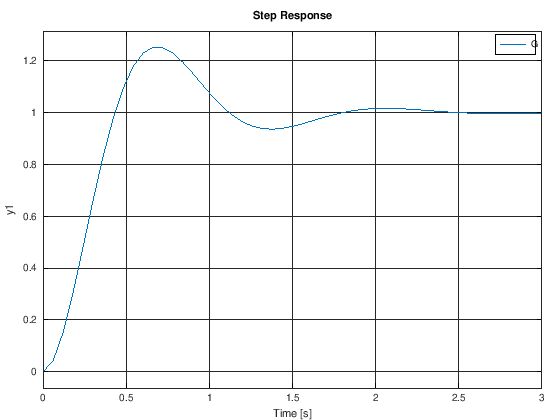

In [5]:
% Definição da Função de Transferência
G = tf([25], [1 4 25]);

% Resposta ao Degrau
step(G)

% Informações da Resposta ao Degrau (Necessário o script 'stepinfo.m')
stepinfo(G)

### Exemplo 2: Encontro a Resposta ao Degrau do Sistema:
$$A = \begin{pmatrix} -1 & -1\\ 6.5 & 0 \end{pmatrix}, B = \begin{pmatrix} 1 & 1\\ 1 & 0 \end{pmatrix}, C = \begin{pmatrix} 1 & 0 \\0 &1 \end{pmatrix}$$


Transfer function 'F' from input 'u1' to output ...

          1 s - 1    
 y1:  ---------------
      s^2 + 1 s + 6.5

         1 s + 7.5   
 y2:  ---------------
      s^2 + 1 s + 6.5

Transfer function 'F' from input 'u2' to output ...

             s       
 y1:  ---------------
      s^2 + 1 s + 6.5

            6.5      
 y2:  ---------------
      s^2 + 1 s + 6.5

Continuous-time model.
    __pole__ at line 30 column 5
    pole at line 56 column 12
    __time_response__>__sim_horizon__ at line 404 column 6
    __time_response__ at line 120 column 14
    step at line 74 column 10


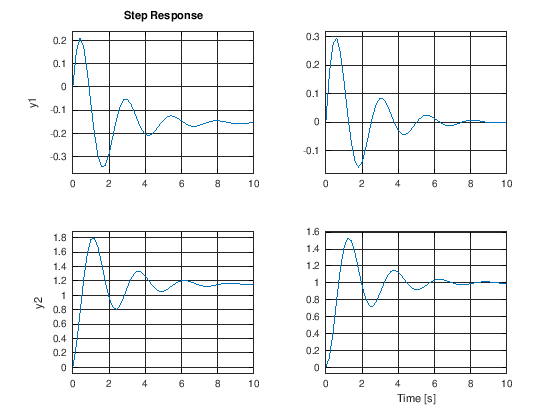

In [10]:
% Matrizes de Estado
A = [-1 -1;6.5 0];
B = [1 1; 1 0];
C = [1 0; 0 1];
D = 0;

% Função de Transferência do Sistema
F = tf(ss(A, B, C, D))

% Resposta ao Degrau
step(F)

### Exemplo 3: Encontro a Resposta ao Impulso do Sistema:
$$A = \begin{pmatrix} 0 & 1\\ -1 & -1 \end{pmatrix}, B = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, C = \begin{pmatrix} 1 & 0 \end{pmatrix}$$


Transfer function 'F' from input 'u1' to output ...

            1      
 y1:  -------------
      s^2 + 1 s + 1

Continuous-time model.


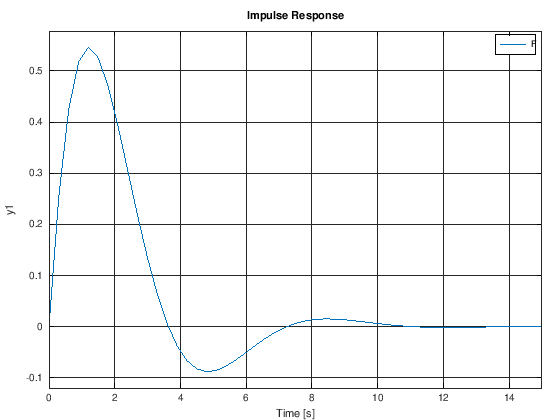

In [19]:
% Matrizes de Estado
A = [0 1; -1 -1];
B = [0 1]';
C = [1 0];
D = 0;

% Função de Transferência do Sistema
F = tf(ss(A, B, C, D))

% Resposta ao Impulso
impulse(F, 15)

### Exemplo 5: Obtenha a Resposta ao Impulso e ao Degrau do Sistemas:
$$G(s)=\frac{1}{s^2 + 0.2s + 1}$$


Transfer function 'G' from input 'u1' to output ...

             1       
 y1:  ---------------
      s^2 + 0.2 s + 1

Continuous-time model.


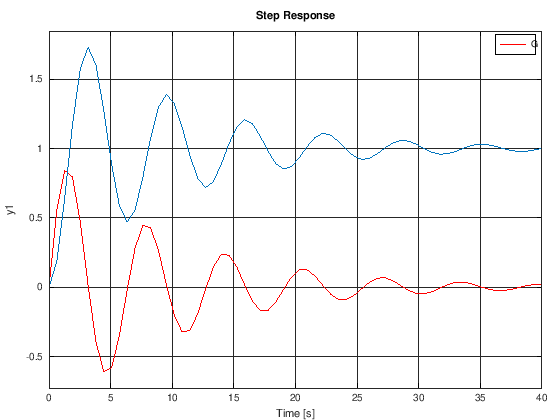

In [101]:
% Função de Transferência do Sistema
G = tf([1], [1 0.2 1])

% Resposta ao Impulso e ao Degrau
impulse(G, 'r', 40)
hold on;
step(G, 40)
hold on;

### Exemplo 6: Obtenha a Transformada de Laplace da Função de Transferência e Compare com os Resultados Anteriores:
$$G(s)=\frac{1}{s^2 + 0.2s + 1}$$

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    mtimes at line 65 column 5

Transfer function 'G' from input 'u1' to output ...

             1       
 y1:  ---------------
      s^2 + 0.2 s + 1

Continuous-time model.


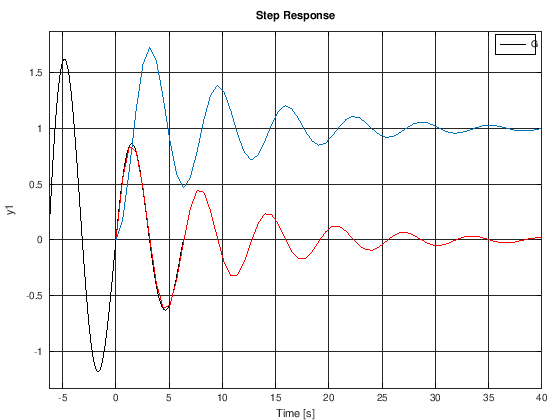

In [92]:
% Variáveis Simbólicas
syms s

% Declaração da Função
g = 1/(s^2 + 0.2*s + 1);

g_step = g/s;

% Cálculo da Inversa de Laplace
g = ilaplace(g);
g = simplify(g);

g_step = ilaplace(g_step);
g_step = simplify(g_step);

% Plotando a Resposta da Função no Tempo
plot_ilap(g, [0 40 -1 1])
hold on;

% plot_ilap(g_step, [0 40 -1 1])
% hold on;

% Função de Transferência do Sistema
G = tf([1], [1 0.2 1])

% Plotando a Análise da Outra Função
impulse(G, 'r', 40)
hold on;
step(G, 40)
hold on;

### Exemplo 7: Obtenha a Resposta uma Entrada Rampa da Função de Transferência:
$$G(s)=\frac{1}{s^2 + 1s + 1}$$


Transfer function 'G' from input 'u1' to output ...

           1     
 y1:  -----------
      s^2 + s + 1

Continuous-time model.

Transfer function 'Gr' from input 'u1' to output ...

            1      
 y1:  -------------
      s^3 + s^2 + s

Continuous-time model.


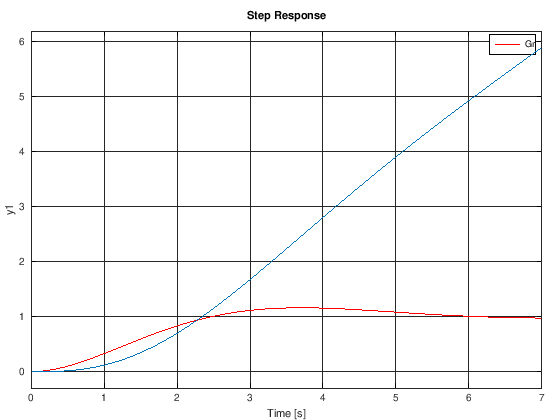

In [103]:
% Função de Transferência do Sistema
G = tf([1], [1 1 1])

% Função de Transferência para a Rampa (1/s)
Gramp = tf([1], [1 1 1 0])

% Resposta ao Degrau e a Rampa
step(G, 'r', 7)
hold on;
step(Gramp, 7)
hold on;

### Exemplo 8: Obtenha a Resposta uma Entrada Arbitrária da Função de Transferência:
$$G(s)=\frac{1}{s^2 + 1s + 1}$$


Transfer function 'G' from input 'u1' to output ...

           1     
 y1:  -----------
      s^2 + s + 1

Continuous-time model.


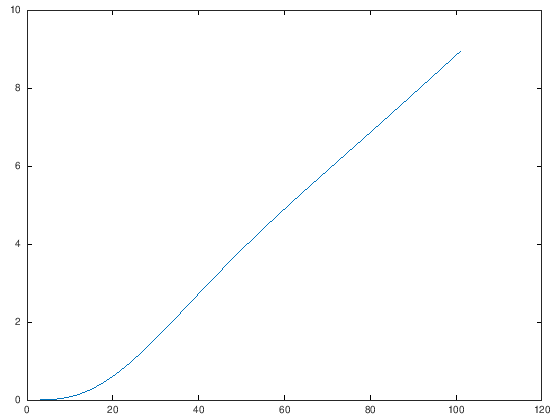

In [110]:
% Função de Transferência do Sistema
G = tf([1], [1 1 1])

% Função da Entrada tipo Rampa
t = 0:0.1:10;
ramp = t;

% Obtendo a Função com Entrada Rampa
Gramp = lsim(G, ramp, t);

% Resposta do Tipo Rampa
plot(Gramp)


### Exemplo 8: Obtenha a Resposta uma Entrada Arbitrária da Função de Transferência:
$$G(s)=\frac{400}{s^2 + 12s + 400}$$
1. Degrau
2. Rampa
3. t^2
4. sen(t)
5. exp(-t)


Transfer function 'G' from input 'u1' to output ...

           1     
 y1:  -----------
      s^2 + s + 1

Continuous-time model.


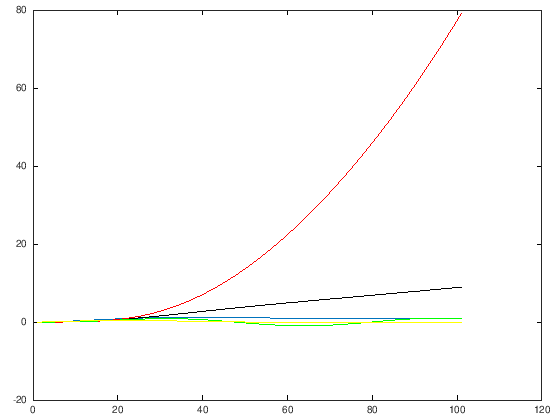

In [124]:
% Função de Transferência do Sistema
G = tf([1], [1 1 1])

% Função das Entradas
t = 0:0.1:10;

degrau = ones(101,1);
ramp = t;
t2 = t.^2;
sent = sin(t);
expt = exp(-t);

% Obtendo a Função das Entradas
Gdeg = lsim(G, degrau, t);
Gramp = lsim(G, ramp, t);
Gt2 = lsim(G, t2, t);
Gsent = lsim(G, sent, t);
Gexpt = lsim(G, expt, t);

% Resposta do Tipo Rampa

plot(Gdeg)
hold on;
plot(Gramp, 'k')
hold on;
plot(Gt2, 'r')
hold on;
plot(Gsent, 'g')
hold on;
plot(Gexpt, 'y')


### Exemplo 9: Obtenha a Resposta uma Entrada Arbitrária para o Sistema em Espaço de Estados:
$$A = \begin{pmatrix} -1 & 0.5\\ -1 & 0 \end{pmatrix}, B = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, C = \begin{pmatrix} 1 & 0 \end{pmatrix}$$
1. Degrau
2. Rampa
3. t^2
4. sen(t)
5. exp(-t)


Transfer function 'G' from input 'u1' to output ...

            0.5      
 y1:  ---------------
      s^2 + 1 s + 0.5

Continuous-time model.


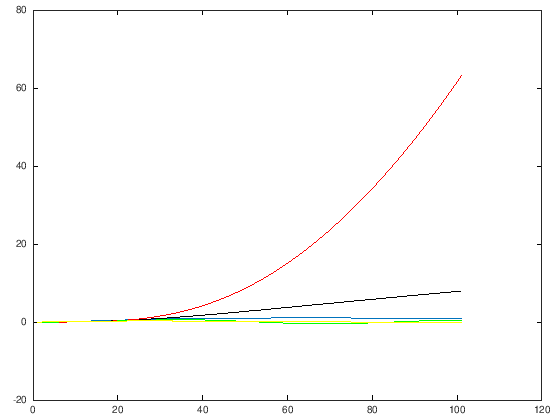

In [139]:
A = [-1 0.5; -1 0];
B = [0;1];
C = [1 0];
D = 0;

% Função de Transferência do Sistema
G = tf(ss(A, B, C, D))

% Função das Entradas
t = 0:0.1:10;
degrau = ones(101,1);
ramp = t;
t2 = t.^2;
sent = sin(t);
expt = exp(-t);

% Obtendo a Função das Entradas
Gdeg = lsim(G, degrau, t);
Gramp = lsim(G, ramp, t);
Gt2 = lsim(G, t2, t);
Gsent = lsim(G, sent, t);
Gexpt = lsim(G, expt, t);

% Resposta do Tipo Rampa

plot(Gdeg)
hold on;
plot(Gramp, 'k')
hold on;
plot(Gt2, 'r')
hold on;
plot(Gsent, 'g')
hold on;
plot(Gexpt, 'y')


### Exemplo 10: Obtenha a Resposta com Condições Iniciais:
$$A = \begin{pmatrix} 0 & 1\\ -10 & -5 \end{pmatrix}, B = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, C = \begin{pmatrix} 0 & 0 \end{pmatrix}$$


ans.a =
        x1   x2
   x1    0    1
   x2  -10   -5

ans.b =
       u1
   x1   0
   x2   0

ans.c =
       x1  x2
   y1   0   0

ans.d =
       u1
   y1   0

Continuous-time model.


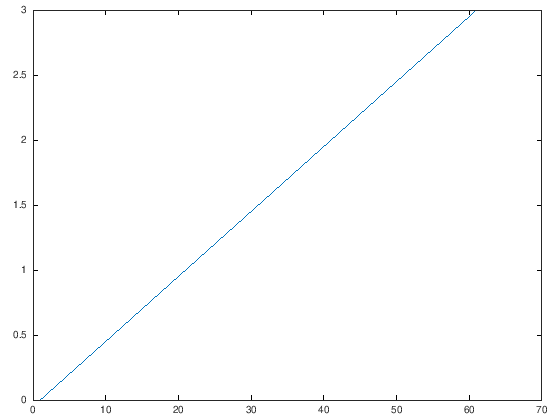

In [161]:
A = [0 1; -10 -5];
B = [ 0; 0];
C = [0 0];
D = 0;

t = 0:0.05:3;

[y, x] = initial(ss(A, B, C, D), [2;1], t);

plot(x)